In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
pd.set_option('display.max_columns', 30)
data = pd.read_csv('../../data/train.csv', dtype = types)

map_df = gpd.read_file('../../data/mexico_map/mexstates.shp')

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [2]:
geo_df = pd.DataFrame()
geo_df['provincia'] = data['provincia']
geo_df['count'] = 1
geo_count = geo_df.groupby('provincia').agg({'count':'sum'})
geo_count.reset_index(inplace = True)
geo_count

,provincia,count
0,Aguascalientes,1753
1,Baja California Norte,3220
2,Baja California Sur,1700
3,Campeche,263
4,Chiapas,1126
5,Chihuahua,4590
6,Coahuila,3695
7,Colima,1008
8,Distrito Federal,58790
9,Durango,2275


In [3]:
provincias_dict = {'Aguascalientes':'Aguascalientes', 'Baja California Norte':'Baja California',
             'Baja California Sur':'Baja California Sur', 'Campeche':'Campeche', 'Chiapas':'Chiapas',
             'Chihuahua':'Chihuahua', 'Coahuila':'Coahuila', 'Colima':'Colima', 'Distrito Federal':'Distrito Federal',
             'Durango':'Durango', 'Edo. de México':'Mexico', 'Guanajuato':'Guanajuato', 'Guerrero': 'Guerrero',
             'Hidalgo':'Hidalgo', 'Jalisco':'Jalisco', 'Michoacán':'Michoacan', 'Morelos':'Morelos',
             'Nayarit':'Nayarit', 'Nuevo León':'Nuevo Leon', 'Oaxaca':'Oaxaca', 'Puebla':'Puebla',
             'Querétaro':'Queretaro', 'Quintana Roo':'Quintana Roo', 'San luis Potosí':'San Luis Potosi',
             'Sinaloa':'Sinaloa', 'Sonora':'Sonora', 'Tabasco':'Tabasco','Tamaulipas':'Tamaulipas',
             'Tlaxcala':'Tlaxcala', 'Veracruz':'Veracruz', 'Yucatán':'Yucatan','Zacatecas':'Zacatecas'}

In [4]:
def gringofy(x):
    return provincias_dict[x]
    
ad = geo_count.rename(columns={'provincia':'ADMIN_NAME'})
ad['ADMIN_NAME'] = ad['ADMIN_NAME'].apply(gringofy)

ad.dtypes

ADMIN_NAME    object
count          int64
dtype: object

In [5]:
merged = map_df.merge(ad, on='ADMIN_NAME')
merged['count'] = np.log(merged['count'])
merged.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry,count
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ...",8.431635
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,...",8.214736
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...,9.637176
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ...",7.741968
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...,7.498870


(-119.98744468643297,
 -85.1553394321589,
 13.642151165294234,
 33.626851749858545)

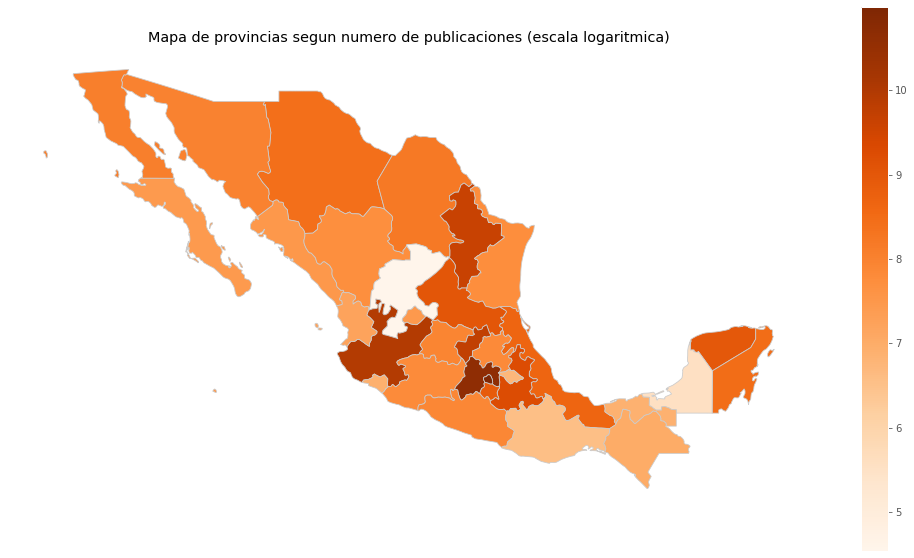

In [6]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(18, 10))

merged.plot(column='count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.set_title('Mapa de provincias segun numero de publicaciones (escala logaritmica)')
ax.axis('off')

In [7]:
avg_price = pd.DataFrame()
avg_price['provincia'] = data['provincia']
avg_price['precioenmiles'] = data['precio']/1000
avg_price = avg_price.groupby('provincia').agg({'precioenmiles':'mean'})
avg_price.reset_index(inplace = True)
avg_price

,provincia,precioenmiles
0,Aguascalientes,1477.188770
1,Baja California Norte,767.441750
2,Baja California Sur,1216.452822
3,Campeche,1570.917821
4,Chiapas,1924.125720
5,Chihuahua,1744.530613
6,Coahuila,1505.305449
7,Colima,1531.380162
8,Distrito Federal,3471.705086
9,Durango,1210.388983


In [8]:
ad = avg_price.rename(columns={'provincia':'ADMIN_NAME'})
ad['ADMIN_NAME'] = ad['ADMIN_NAME'].apply(gringofy)

In [9]:
merged = map_df.merge(ad, on='ADMIN_NAME')
merged.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry,precioenmiles
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ...",1744.530613
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,...",1505.305449
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...,2717.757655
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ...",1589.666978
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...,1634.571645


(-119.98744468643297,
 -85.1553394321589,
 13.642151165294234,
 33.626851749858545)

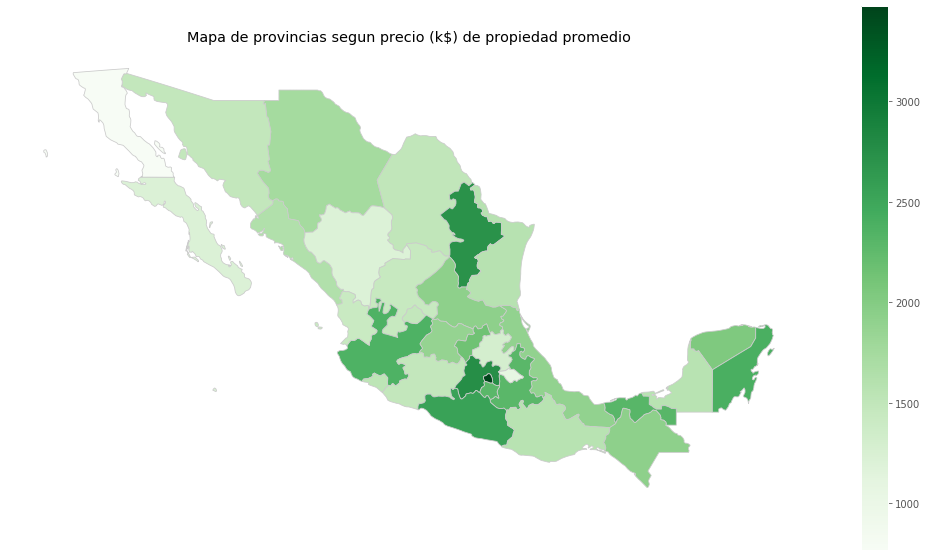

In [10]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(18, 10))

merged.plot(column='precioenmiles', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.set_title('Mapa de provincias segun precio (k$) de propiedad promedio')
ax.axis('off')

In [11]:
m_price = pd.DataFrame()
m_price['provincia'] = data['provincia']
m_price['metrostotales'] = data['metrostotales']
m_price['precio'] = data['precio']
m_price['precio_por_m2'] = m_price['precio']/m_price['metrostotales']
m_price
m_price = m_price.groupby('provincia').agg({'precio_por_m2':'mean', 'metrostotales':'mean'})
m_price.reset_index(inplace = True)
m_price

,provincia,precio_por_m2,metrostotales
0,Aguascalientes,8191.787234,173.284826
1,Baja California Norte,5968.995969,128.017080
2,Baja California Sur,6485.002327,182.840849
3,Campeche,8697.074357,204.650655
4,Chiapas,11020.039292,179.228690
5,Chihuahua,7651.501242,213.807702
6,Coahuila,7042.142596,208.891884
7,Colima,7313.212268,178.943596
8,Distrito Federal,24011.411266,161.503146
9,Durango,6367.351148,184.109168


In [12]:
m_price = m_price.rename(columns={'provincia':'ADMIN_NAME'})
m_price['ADMIN_NAME'] = m_price['ADMIN_NAME'].apply(gringofy)

In [13]:
merged = map_df.merge(m_price, on='ADMIN_NAME')
merged.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry,precio_por_m2,metrostotales
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ...",7651.501242,213.807702
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,...",7042.142596,208.891884
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...,13197.894574,180.023322
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ...",8399.849454,181.859500
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...,9168.727438,175.840000


(-119.98744468643297,
 -85.1553394321589,
 13.642151165294234,
 33.626851749858545)

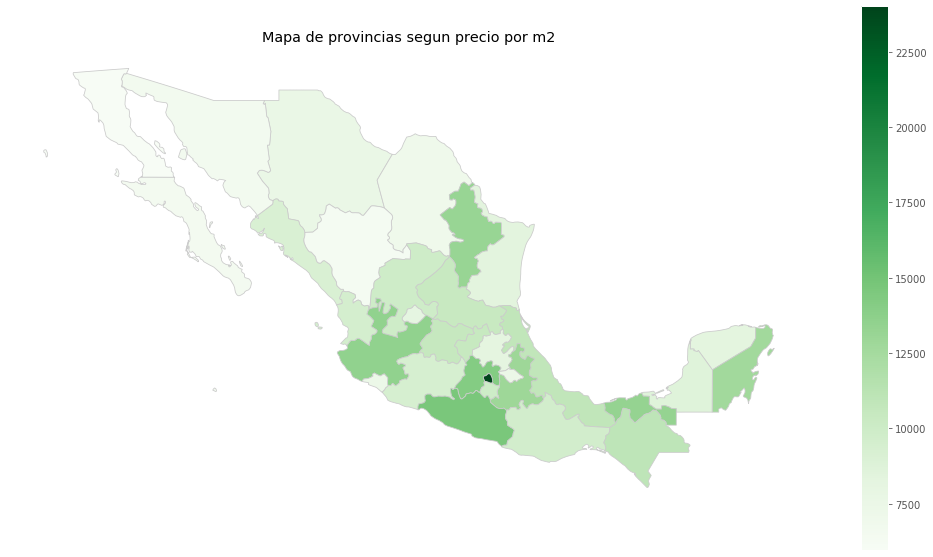

In [14]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(18, 10))

merged.plot(column='precio_por_m2', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.set_title('Mapa de provincias segun precio por m2')
ax.axis('off')

(-119.98744468643297,
 -85.1553394321589,
 13.642151165294234,
 33.626851749858545)

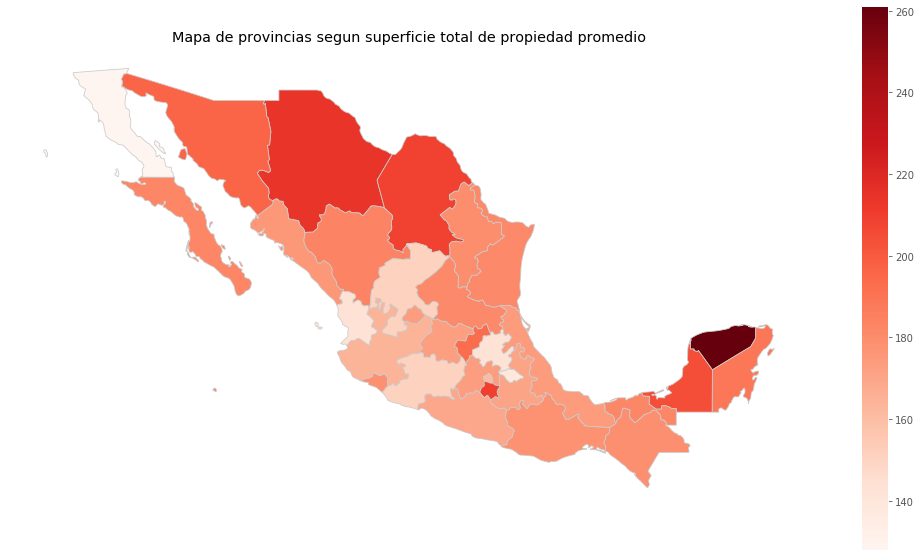

In [15]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(18, 10))

merged.plot(column='metrostotales', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.set_title('Mapa de provincias segun superficie total de propiedad promedio')
ax.axis('off')

In [16]:
antiguedad = pd.DataFrame()
antiguedad['antiguedad'] = data['antiguedad']
antiguedad['provincia'] = data['provincia']
antiguedad = antiguedad.groupby('provincia').agg({'antiguedad':'mean'})
antiguedad.reset_index(inplace = True)
antiguedad

,provincia,antiguedad
0,Aguascalientes,7.524580
1,Baja California Norte,5.788405
2,Baja California Sur,2.459770
3,Campeche,3.914573
4,Chiapas,5.412871
5,Chihuahua,6.518198
6,Coahuila,6.306214
7,Colima,5.674877
8,Distrito Federal,12.189608
9,Durango,4.993979


In [17]:
antiguedad = antiguedad.rename(columns={'provincia':'ADMIN_NAME'})
antiguedad['ADMIN_NAME'] = antiguedad['ADMIN_NAME'].apply(gringofy)

merged = map_df.merge(antiguedad, on='ADMIN_NAME')
merged.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry,antiguedad
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ...",6.518198
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,...",6.306214
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...,7.539231
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ...",5.550216
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...,6.149014


(-119.98744468643297,
 -85.1553394321589,
 13.642151165294234,
 33.626851749858545)

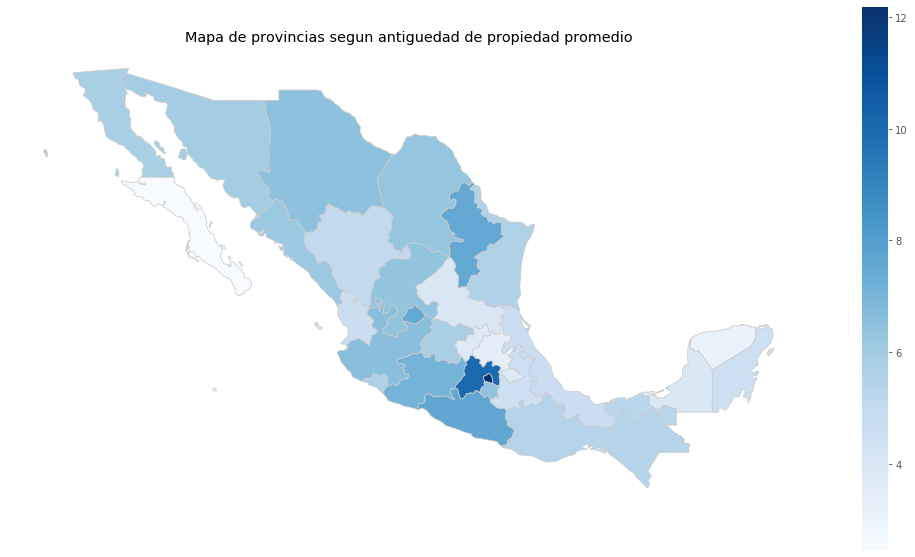

In [18]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(18, 10))

merged.plot(column='antiguedad', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.set_title('Mapa de provincias segun antiguedad de propiedad promedio')
ax.axis('off')

In [19]:
tipo = pd.DataFrame()
tipo['provincia'] = data['provincia']
tipo['tipodepropiedad'] = data['tipodepropiedad']
tipo['count'] = 1
tipo.head(10)

,provincia,tipodepropiedad,count
0,Distrito Federal,Apartamento,1
1,Distrito Federal,Casa en condominio,1
2,Jalisco,Casa,1
3,Edo. de México,Casa,1
4,Jalisco,Apartamento,1
5,Distrito Federal,Apartamento,1
6,Oaxaca,Casa,1
7,Quintana Roo,Casa,1
8,Colima,Apartamento,1
9,Edo. de México,Terreno,1


In [20]:
def definir_tipo(x):
    tipos_apartamento = ['Apartamento', 'Departamento Compartido']
    if x in ['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Quinta Vacacional']:
        return 'Casa'
    elif x in ['Apartamento', 'Departamento Compartido']:
        return 'Apartamento'
    return 'Otro'

tipo['tipodepropiedad'] = tipo['tipodepropiedad'].apply(definir_tipo)
tipo = tipo.loc[tipo.tipodepropiedad != 'Otro']
tipo.head()

,provincia,tipodepropiedad,count
0,Distrito Federal,Apartamento,1
1,Distrito Federal,Casa,1
2,Jalisco,Casa,1
3,Edo. de México,Casa,1
4,Jalisco,Apartamento,1


In [21]:
n_totales = tipo.groupby(['provincia']).agg({'count':'sum'})
n_tipos = tipo.groupby(['provincia', 'tipodepropiedad']).agg({'count':'sum'})
n_tipos.reset_index(inplace = True)
n_totales.reset_index(inplace = True)
n_tipos = n_tipos.merge(n_totales, on='provincia')
n_tipos['count_x'] = n_tipos['count_x']/n_tipos['count_y']
n_tipos.drop(columns=['count_y'], inplace=True)
n_tipos.rename(columns = {'count_x':'porcentaje'}, inplace = True)
n_tipos

,provincia,tipodepropiedad,porcentaje
0,Aguascalientes,Apartamento,0.029430
1,Aguascalientes,Casa,0.970570
2,Baja California Norte,Apartamento,0.064013
3,Baja California Norte,Casa,0.935987
4,Baja California Sur,Apartamento,0.051411
...,...,...,...
59,Veracruz,Casa,0.889519
60,Yucatán,Apartamento,0.077400
61,Yucatán,Casa,0.922600
62,Zacatecas,Apartamento,0.011905


/home/pablo/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

<Figure size 864x432 with 0 Axes>

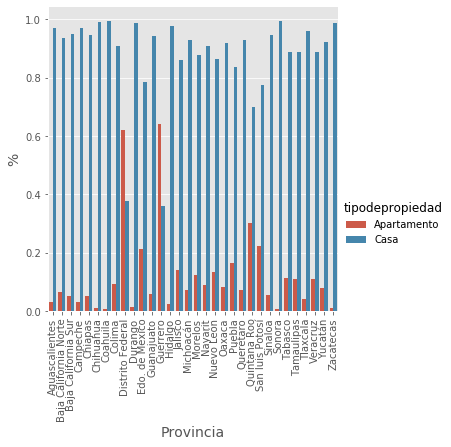

In [22]:
plt.figure(figsize=(12, 6))
plt.suptitle('% de casas y departamentos por provincia', fontsize=18)
sns.factorplot(x='provincia', y='porcentaje', hue='tipodepropiedad', data=n_tipos, kind='bar')
plt.ylabel("%", fontsize = 14)
plt.xlabel("Provincia", fontsize = 14)
plt.xticks(rotation=90)